In [ ]:
import pandas as pd

In [ ]:
#importing the dataset
df=pd.read_csv('/content/sample_data/abalone.csv')

In [ ]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
import seaborn as sns
import numpy as np

# **Univariate Analaysis**

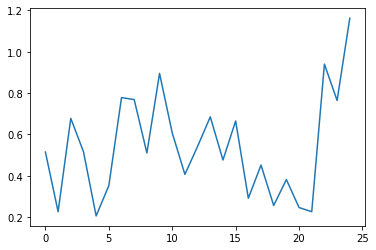

In [ ]:
df.head(25).WholeWeight.plot()

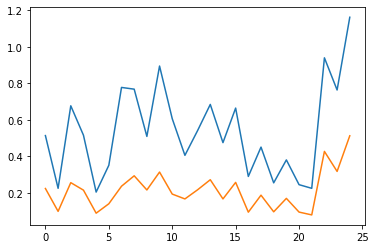

In [ ]:
df.head(25).WholeWeight.plot()
df.head(25).ShuckedWeight.plot()

Text(0.5, 6.79999999999999, 'Age')

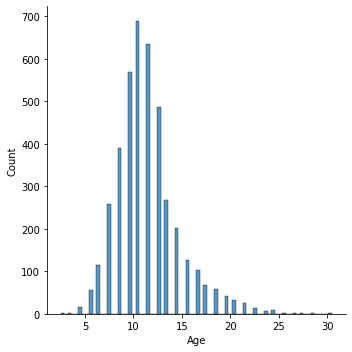

In [ ]:
sns.displot(df.Rings+1.5)
plt.xlabel("Age")

# **Bi-Variate Analysis**

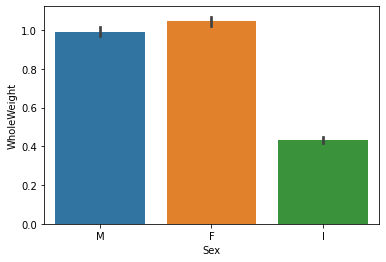

In [ ]:
sns.barplot(x='Sex',y='WholeWeight',data=df)


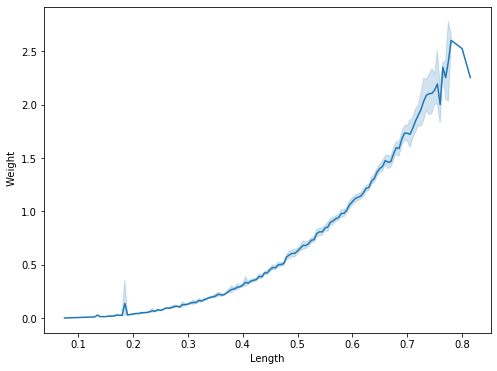

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df["Length"], y=df["WholeWeight"]);
plt.xlabel('Length');
plt.ylabel(' Weight');

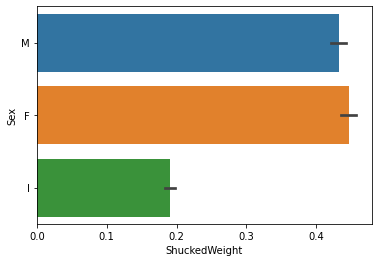

In [ ]:
sns.barplot(x='ShuckedWeight',y='Sex',data=df)

# **Multi-Variate Analysis**

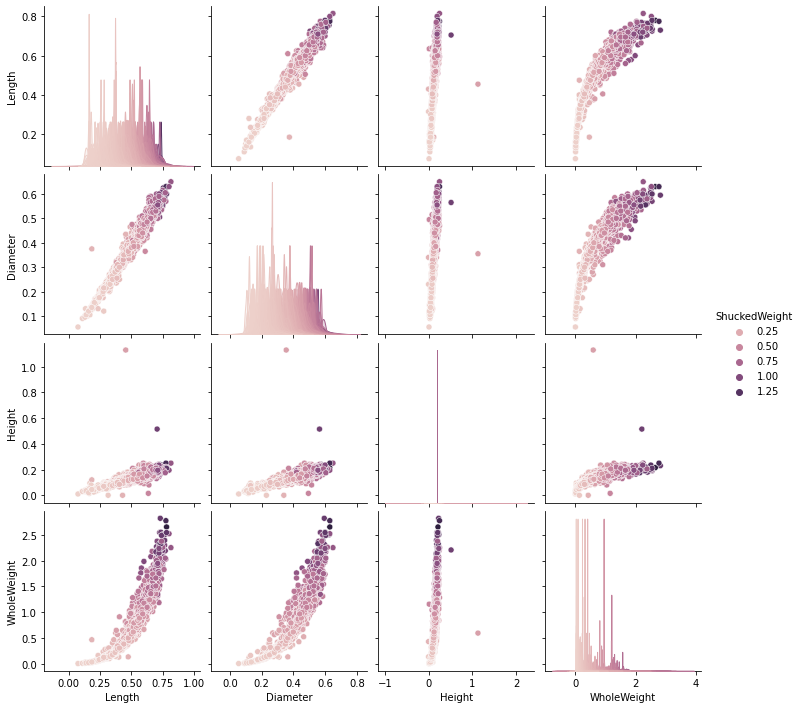

In [ ]:
sns.pairplot(data=df[["Length","Diameter","Height","ShuckedWeight","WholeWeight"]],hue="ShuckedWeight",diag_kind='kde')

# **Descriptive Statistics**

In [ ]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
print ("Mean: ",df['WholeWeight'].mean())
print ("Mode: ",df['ShuckedWeight'].mode())
print ("Median: ",df['ShellWeight'].median())

Mean:  0.8287421594445774
Mode:  0    0.175
dtype: float64
Median:  0.234


# **Handling the missing Null Values**

In [ ]:
df.shape

(4177, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df['Length'].fillna(df['Length'].mean(),inplace=True)
df['Diameter'].fillna(df['Diameter'].median(),inplace=True)
df['Height'].fillna(df['Height'].mode(),inplace=True)

In [ ]:
df.isnull().any()

Sex              False
Length           False
Diameter         False
Height           False
WholeWeight      False
ShuckedWeight    False
VisceraWeight    False
ShellWeight      False
Rings            False
dtype: bool

# **Find the Outliers and remove the outliers**

### **Remove Outlier Using IQR**

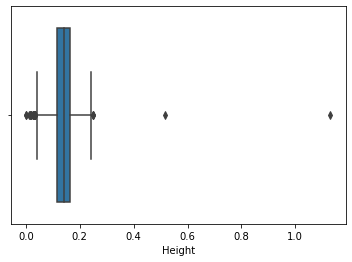

In [ ]:
sns.boxplot(df.Height)

In [ ]:
q1=df.Height.quantile(0.25)
q3=df.Height.quantile(0.75)

In [ ]:
IQR=q3-q1

In [ ]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [ ]:
df=df[df.Height<upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


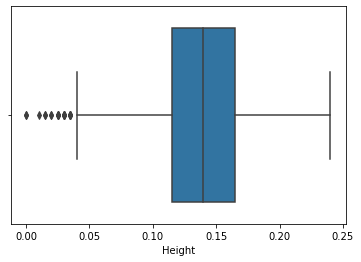

In [ ]:
sns.boxplot(df.Height)

In [ ]:
p99=df.Height.quantile(0.0058)
p99

0.04

In [ ]:
df=df[df.Height>=p99]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


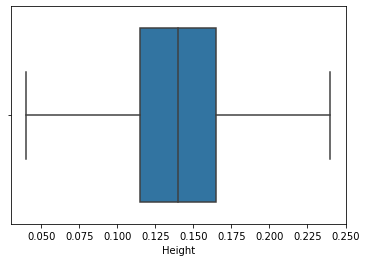

In [ ]:
sns.boxplot(df.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


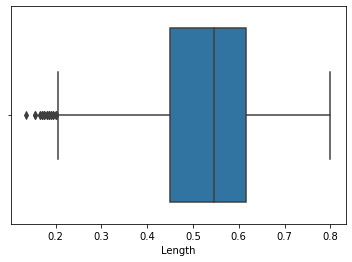

In [ ]:
sns.boxplot(df.Length)

In [ ]:
p99=df.Length.quantile(0.0108)
p99

0.22

In [ ]:
df2=df[df.Length>=p99]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


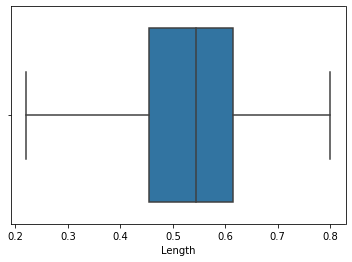

In [ ]:
sns.boxplot(df2.Length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


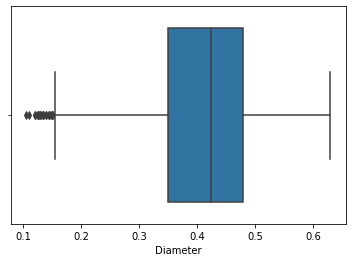

In [ ]:
sns.boxplot(df.Diameter)

In [ ]:
p99=df.Diameter.quantile(0.0108)
p99

0.17764200000000002

In [ ]:
df=df[df.Diameter>=p99]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


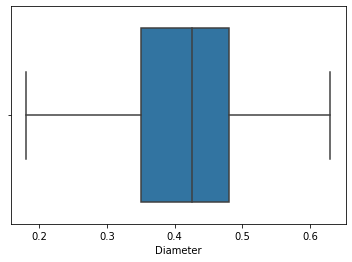

In [ ]:
sns.boxplot(df.Diameter)

# **Perform Encoding on Categorical column**
###**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df.Sex=le.fit_transform(df.Sex)

In [ ]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# **Split the data into dependent and independent variable**

In [ ]:
#Independent variable
df_main=df
X=df_main.drop(columns=['Rings'],axis=1)
X.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
Y=df_main['Rings']
Y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# **Scaling the Independent Variable**

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1.143297,-0.687408,-0.530045,-1.283270,-0.690103,-0.652390,-0.774633,-0.686482
1,1.143297,-1.635950,-1.619625,-1.422052,-1.291496,-1.227017,-1.263952,-1.273910
2,-1.268031,-0.009878,0.069224,-0.173010,-0.350321,-0.505286,-0.397158,-0.245911
3,1.143297,-0.822914,-0.530045,-0.450575,-0.685934,-0.693763,-0.653468,-0.649768
4,-0.062367,-1.816624,-1.728584,-1.699617,-1.334230,-1.272988,-1.347835,-1.384052


# **Split Data into trainig and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(2855, 8)

In [ ]:
y_train.shape

(2855,)

In [ ]:
X_test.shape

(1224, 8)

In [ ]:
y_test.shape

(1224,)

# **Training and Testing the Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.5137128663379753, 0.48232626240226983)

In [ ]:
model = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=40)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.5949111412862702, 0.36300931276023396)